# Feature Importance and Regression Models

11 features for which feataure importance has been calculated using Random Forest
1. finishedsquarefeet13
2. finishedsquarefeet15
3. finishedsquarefeet6
4. garagecarcnt
5. garagetotalsqft
6. heatingorsystemtypeid
7. landtaxvaluedollarcnt
8. numberofstories
9. taxamount
10. taxvaluedollarcnt
11. unitcnt

The random forest training was run on AWS and the results have been imported back as csv. 

In this notebook, each target feature, a polynomial regression model is fit using the most important features. The number of features for each training is subjective to individual feature

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

Importing Data

In [75]:
path = "C:\\Users\\lakshay\\Documents\\zes\\zestims\\data\\input\\"
df = pd.read_pickle(path + "train_df_partial_filled.pkl")
df.shape

(3064055, 60)

Creating feature importance dataframes for each target feature

In [2]:
path = "../../data/feature_importance/"
feature_list = []
filenames = []
importance_dfs = []
for filename in glob(path + "*.csv"):
    filenames.append(filename)
    feature = filename[30:-18]
    feature_list.append(feature)
    df = pd.read_csv(filename)
    importance_dfs.append(df)

# 1. 7 - landtaxvaluedollarcnt, 9 - taxamount, 10 - taxvaluledollarcnt

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


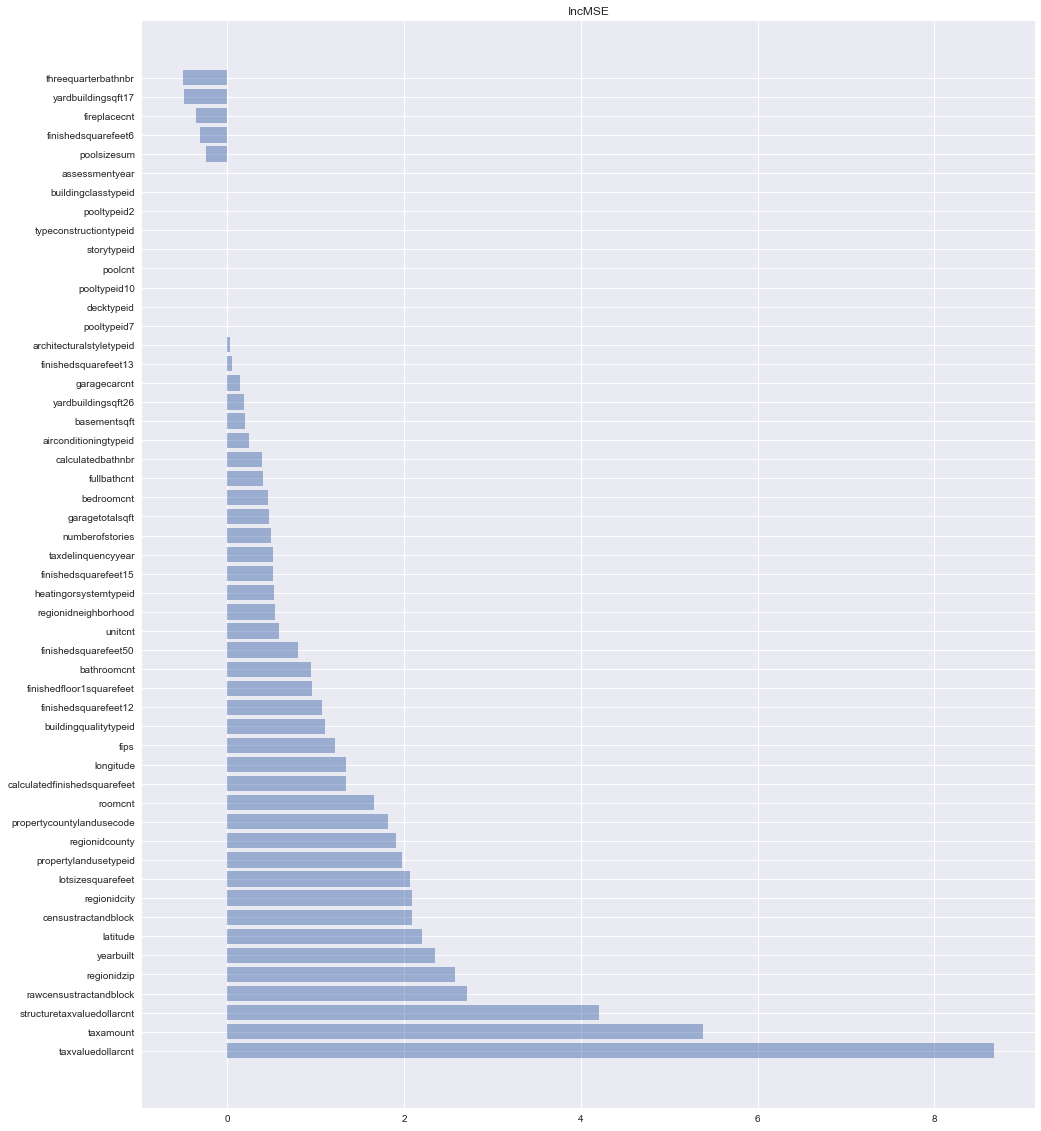

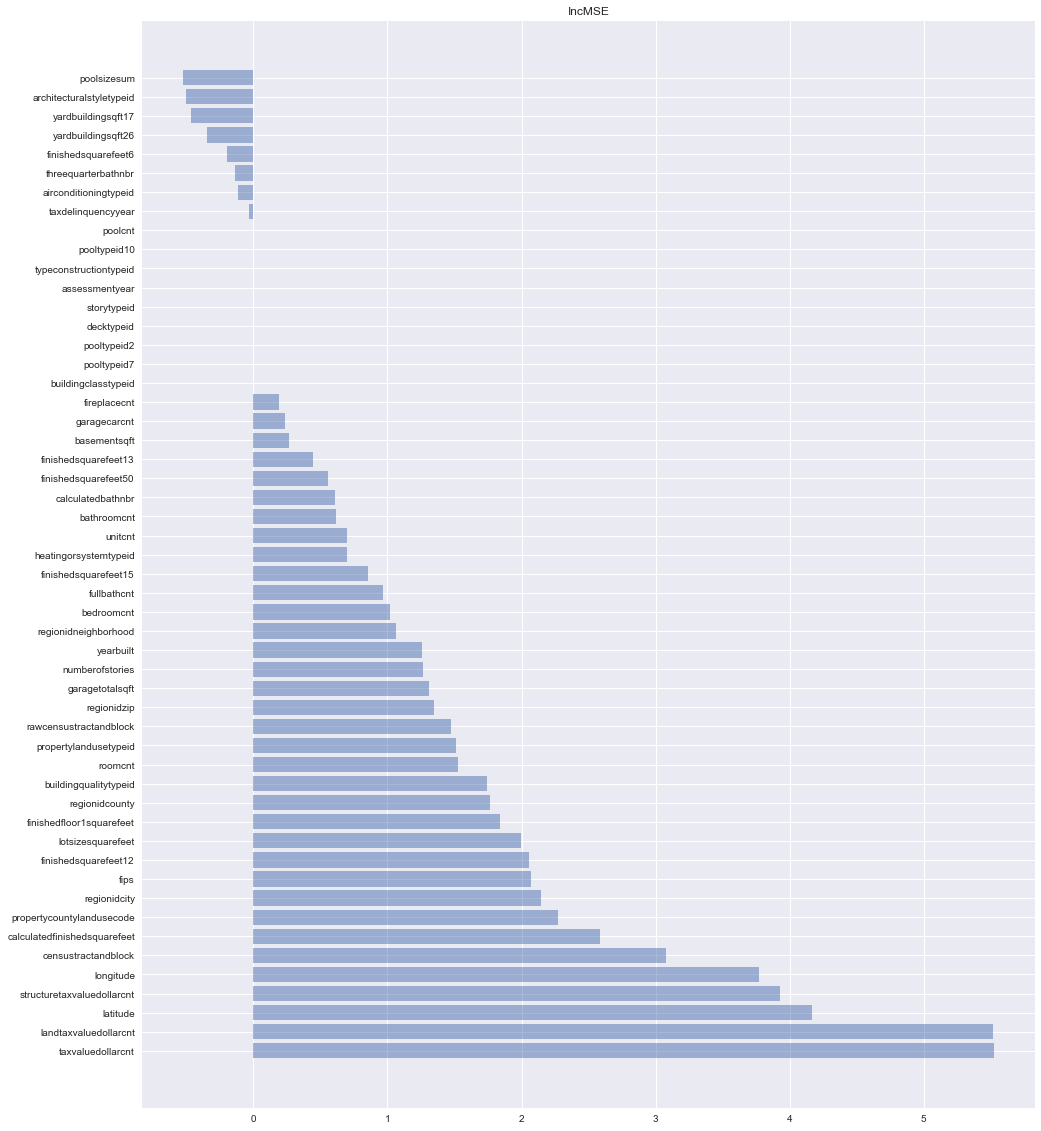

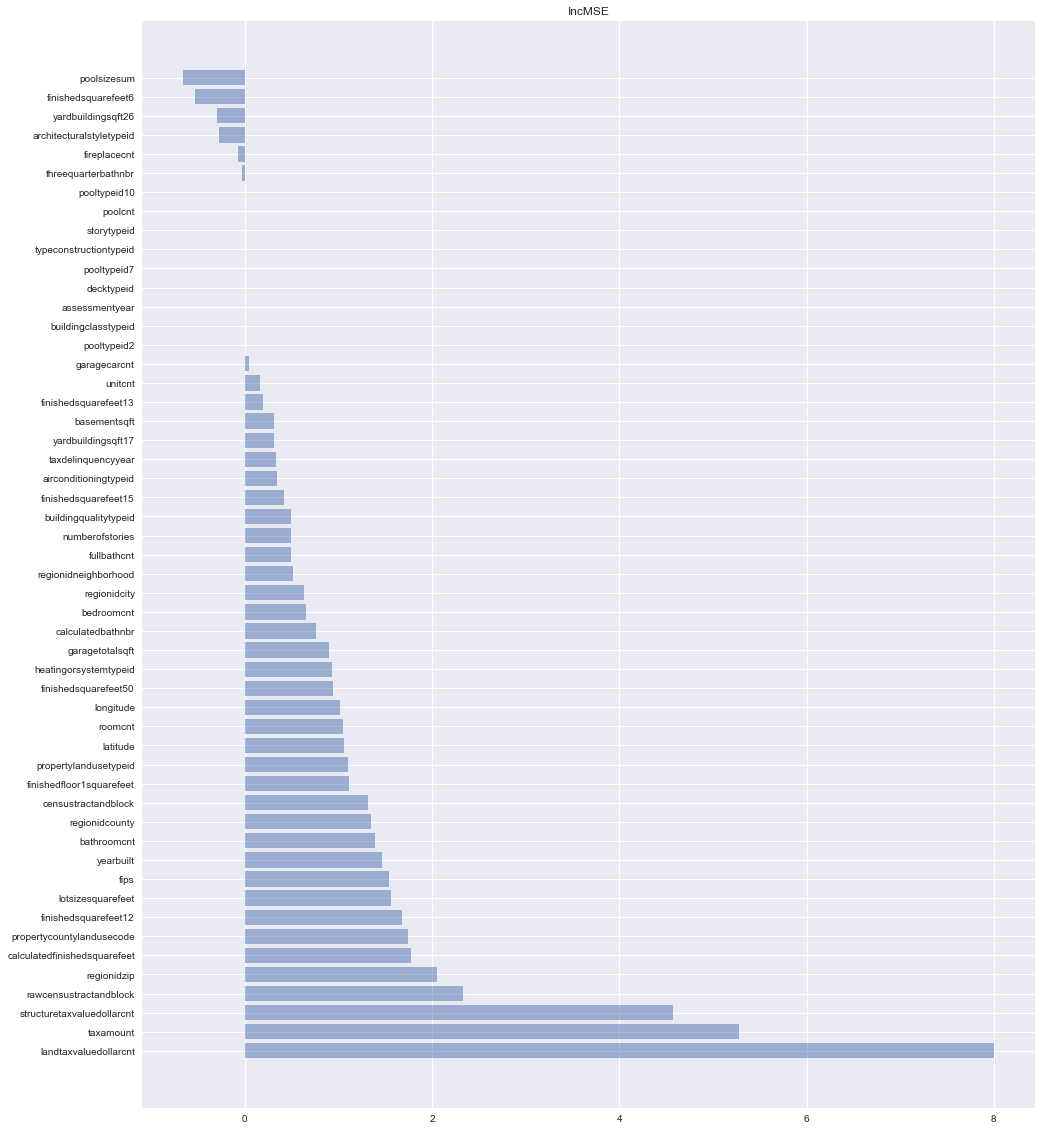

In [122]:
tax_imp_features = []

for i in (6,8,9):
    df1 = importance_dfs[i]
    #df1 = df1.sort_values(by = ["%IncMSE"])
    df1 = df1.sort_values(by = ["%IncMSE"],ascending=False).reset_index()

    # Plot importance
    a = df1["Unnamed: 0"].values
    #b = df1["IncNodePurity"].values
    b = df1["%IncMSE"].values
    names = np.ndarray.tolist(a)
    imp = np.ndarray.tolist(b)
    y_pos = np.arange(len(names))
    plt.figure(figsize=(16,20))
    plt.barh(y_pos,imp, align='center', alpha=0.5)
    plt.yticks(y_pos, names);
    plt.title("IncMSE")
    tax_imp_features.append(list(df1["Unnamed: 0"].ix[0:14].values))

Since some of the features have strings as values (propertycountylandusecode), they are removed

In [109]:
# removing non-numeric features
for i in range(len(tax_imp_features)):
    print i
    tax_imp_features[i].remove('propertycountylandusecode')    

0
1
2


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

target = ["landtaxvaluedollarcnt","taxamount","taxvaluledollarcnt"]
j = 0

for target_var in target:
    features = tax_imp_features[j]
    features.remove(target)
    max_num_features = len(features)
    X = df[features].as_matrix()
    y = df[target].values
    sc = StandardScaler()
    X_new = sc.fit_transform(X,y=y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    clf = SVR(kernel='rbf', degree=3, gamma='auto', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, \
              shrinking=True, cache_size=200, verbose=False, max_iter=-1)
    
    clf.fit(X_train, y_train) 

    
    

ValueError: invalid literal for float(): 010E

In [110]:
df_del_me = df[features]
df_del_me.isnull().sum(axis=0)

taxvaluedollarcnt                31114
taxamount                        19819
structuretaxvaluedollarcnt       43925
rawcensustractandblock               0
regionidzip                          0
yearbuilt                        49247
latitude                             0
censustractandblock              64294
regionidcity                         0
lotsizesquarefeet               274812
propertylandusetypeid                0
regionidcounty                       0
propertycountylandusecode          841
roomcnt                             38
calculatedfinishedsquarefeet     44789
dtype: int64

In [120]:
target = ["landtaxvaluedollarcnt","taxamount","taxvaluledollarcnt"]
features = tax_imp_features[0]
#features.remove(target)
features
a = [x for x in features if x not in target]
a

['taxvaluedollarcnt',
 'structuretaxvaluedollarcnt',
 'rawcensustractandblock',
 'regionidzip',
 'yearbuilt',
 'latitude',
 'censustractandblock',
 'regionidcity',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcounty',
 'roomcnt',
 'calculatedfinishedsquarefeet']

In [121]:
features

['taxvaluedollarcnt',
 'taxamount',
 'structuretaxvaluedollarcnt',
 'rawcensustractandblock',
 'regionidzip',
 'yearbuilt',
 'latitude',
 'censustractandblock',
 'regionidcity',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'regionidcounty',
 'roomcnt',
 'calculatedfinishedsquarefeet']